In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('..\DataCleaning\hotel_review_data_cleaned.csv')

In [3]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'], test_size=0.2, random_state=42)

In [4]:
# Vectorizing the reviews using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tf = tfidf_vectorizer.fit_transform(X_train)
X_test_tf = tfidf_vectorizer.transform(X_test)

In [5]:
# Defining the SVM model
svm_model = SVC()

# Training the SVM model
svm_model.fit(X_train_tf, y_train)

SVC()

In [6]:
# Predicting on the test set
y_pred_norm = svm_model.predict(X_test_tf)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred_norm))
print("Accuracy:", accuracy_score(y_test, y_pred_norm))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1200
           1       0.50      0.18      0.26      1134
           2       0.81      0.95      0.88      4594

    accuracy                           0.78      6928
   macro avg       0.68      0.60      0.61      6928
weighted avg       0.74      0.78      0.74      6928

Accuracy: 0.7771362586605081


In [7]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [8]:
# Defining the hyperparameters for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]  # Kernel coefficient
}

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
search_result = grid_search.fit(X_train_tf, y_train)


In [9]:
# Print best parameters found by grid search
print("Best Score:", search_result.best_score_)

# Print best parameters found by grid search
print("Best Parameters:", search_result.best_params_)

Best Score: 0.7632540040905006
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [10]:
# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_tf)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1200
           1       0.50      0.18      0.26      1134
           2       0.81      0.95      0.88      4594

    accuracy                           0.78      6928
   macro avg       0.68      0.60      0.61      6928
weighted avg       0.74      0.78      0.74      6928

Accuracy: 0.7772806004618937


In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

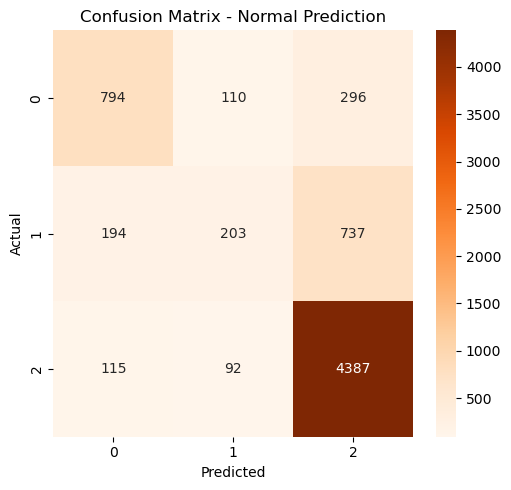

In [12]:
# Calculate confusion matrices for Normal Prediction
conf_matrix = confusion_matrix(y_test, y_pred_norm)

# Plotting confusion matrix for Normal Prediction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=True)
plt.title("Confusion Matrix - Normal Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

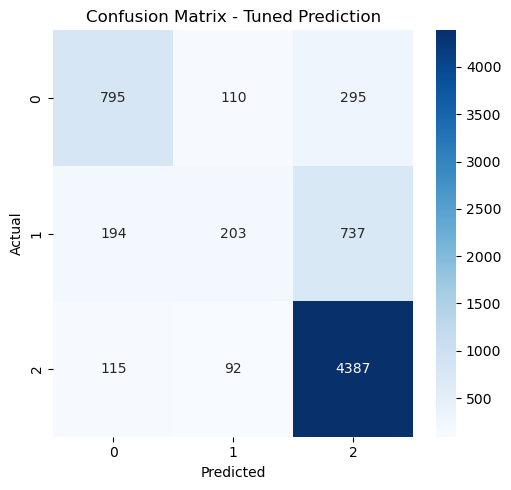

In [13]:
# Calculate confusion matrices for Tuned Prediction
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix for Tuned Prediction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Tuned Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

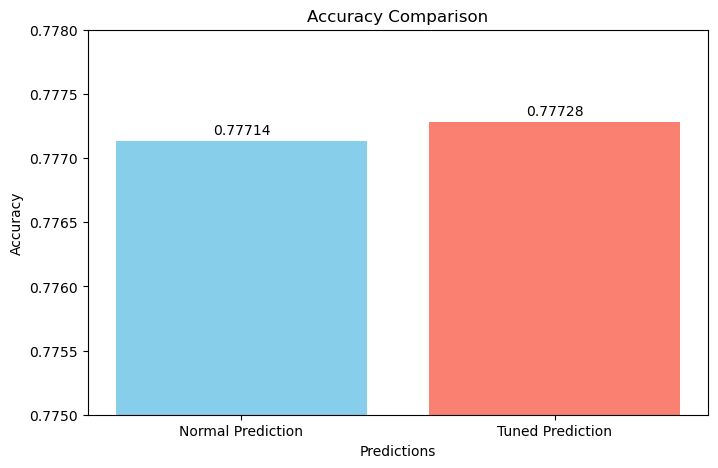

In [25]:
# Model accuracy scores
accuracy_1 = 0.7771362586605081
accuracy_2 = 0.7772806004618937

# Plotting accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(["Normal Prediction", "Tuned Prediction"], [accuracy_1, accuracy_2], color=['skyblue', 'salmon'])
plt.title("Accuracy Comparison")
plt.xlabel("Predictions")
plt.ylabel("Accuracy")

# Adjusting y-axis limits to highlight slight differences
plt.ylim(0.775, 0.778)

# Adding text annotation to show the difference
plt.text(0, accuracy_1 + 0.00005, "{:.5f}".format(accuracy_1), ha='center')
plt.text(1, accuracy_2 + 0.00005, "{:.5f}".format(accuracy_2), ha='center')

plt.show()